---

# Reconhecimento de Padrões - SIN492

## Projeto prático - Período de Verão 2024-0
### Sistemas de Informação, Universidade Federal de Viçosa - Campus Rio Paranaíba 

### Alunas:
 - Sabrina Dias Guimarães - 7639
 - Thalyta Maely Correa - 6392
 - Viviane Renizia Mendes Silva - 5209

### Professores:
 - Profª. Me. Larissa Ferreira Rodrigues Moreira
 - Prof. Me. Leandro Henrique Furtado P. Silva

---

## Reconhecimento de Padrões - Inteligência Artificial
O reconhecimento de padrões é um conceito fundamental em *machine learning*, e é essencial na criação de sistemas que podem aprender e tomar decisões com base em dados. Essa tecnologia permite que os computadores identifiquem padrões e regularidades em conjuntos de dados, possibilitando a classificação, a previsão e a identificação de tendências.

No reconhecimento de padrões, os algoritmos de aprendizado de máquina analisam e comparam dados para encontrar semelhanças ou diferenças. Isso pode ser aplicado em diversos campos, como reconhecimento facial, análise de sentimentos, diagnóstico médico e processamento de linguagem natural.


Os sistemas de reconhecimento de padrões são treinados usando grandes conjuntos de dados, nos quais aprendem a identificar correlações e características importantes. Uma vez treinados, esses sistemas podem aplicar esse conhecimento para interpretar novos dados, fazendo previsões ou identificando categorias relevantes.



| A eficácia do reconhecimento de padrões depende da qualidade e da quantidade dos dados utilizados no treinamento, assim como da precisão dos algoritmos. Com o avanço da inteligência artificial, o reconhecimento de padrões está se tornando cada vez mais sofisticado, permitindo aplicações mais complexas e precisas em uma variedade de indústrias. | ![Pattern Recognition](img/pattern_rec.jpg) |
| ----------------- | ------------------------------------------------------------ |
---

## Base de dados fornecida
A base de dados [dataset_SIN492.parquet](https://drive.google.com/file/d/1haNcYaDGCMbZAX3jmX_5pkkYraQ0Wdwa/view) possui 466 entradas e é composta inicialmente por 16 features (feature0, feature1, ..., feature15) e uma coluna target que corresponde a classe. A coluna target é *zero* indicando a não ocorrência do evento que deseja-se prever e *um* quando ha ocorrência do evento que deseja-se prever.

---

## Objetivos
- Praticar e aprimorar conceitos de Reconhecimento de Padrões.
- Solidificar conceitos de gerenciamento de projetos e sua implementacão (Full Stack).
- Induzir o aprendizado e pratica da escrita científica.
- Aprimorar as capacidades de programacão
  
---

## Atividades
- Analise exploratória dos dados.
- Preparacão dos dados.
- Modelagem.
- Avaliacão e Performance dos Modelos.
- Interpretação dos Resultados.
- Entrega do Projeto.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("viridis"))

---
## Análise dos Dados

Antes de iniciar qualquer análise, é necessário verificar a estrutura do  *dataset*. Desse modo, serão analisadas as 5 primeiras entradas:

In [2]:
file_path = 'data/dataset_SIN492.parquet'

df = pd.read_parquet(file_path)

# Apenas salvando uma versão .csv do arquivo
df.to_csv("data/dataset_SIN492.csv", index=False)

df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


Após verificar a estrutura do *dataset*, podemos observar que:

O conjunto possui várias colunas nomeadas desde 'feature0' até 'feature15', além de uma coluna 'target'. Os valores nessas colunas são numéricos e variam significativamente em magnitude, sugerindo que o conjunto de dados pode conter diferentes tipos de características (features), possivelmente de diferentes domínios ou métricas (medidas).

Precisamos entender o significado e a origem de cada característica para realizar uma análise mais aprofundada. Além disso, devemos realizar uma etapa de pré-processamento dos dados, como normalização ou padronização, principalmente considerando o objetivo de utilizar um modelo de aprendizado de máquina, que são modelos sensíveis à escala dos dados.

O índice do dataframe está estranho, como se linhas tivessem sido removidas, ou filtradas antes de salvar o arquivo, vamos redefinir o índice.


### **Redefinindo o índice**

In [3]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
2,50.0,23,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


### **Quantidade de atributos (variáveis) e de entradas do conjunto de dados**

In [4]:
print(f'Entradas no DataFrame: {df.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {df.shape[1]} colunas no total')

Entradas no DataFrame: 466 linhas no total
Variáveis no DataFrame: 17 colunas no total


### **Verificando o tipo dos dados**

In [5]:
display(df.dtypes)

feature0     float64
feature1       int64
feature2     float64
feature3     float64
feature4     float64
feature5     float64
feature6       int64
feature7     float64
feature8     float64
feature9       int64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15      int64
target         int64
dtype: object

### **Porcentagem de valores ausentes no *dataset***

In [6]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Variáveis faltantes': missing_values, 'Porcentagem': missing_values_percentage})
missing_df.sort_values(by='Porcentagem', ascending=False)

,Variáveis faltantes,Porcentagem


Pode-se notar que, surpreendentemente, nenhuma variável no *dataset* apresenta valores ausentes!

### **Tipo de distribuição das variáveis** 

Será utilizado o **histograma** para identificar a distribuição das variáveis do *dataset*. 

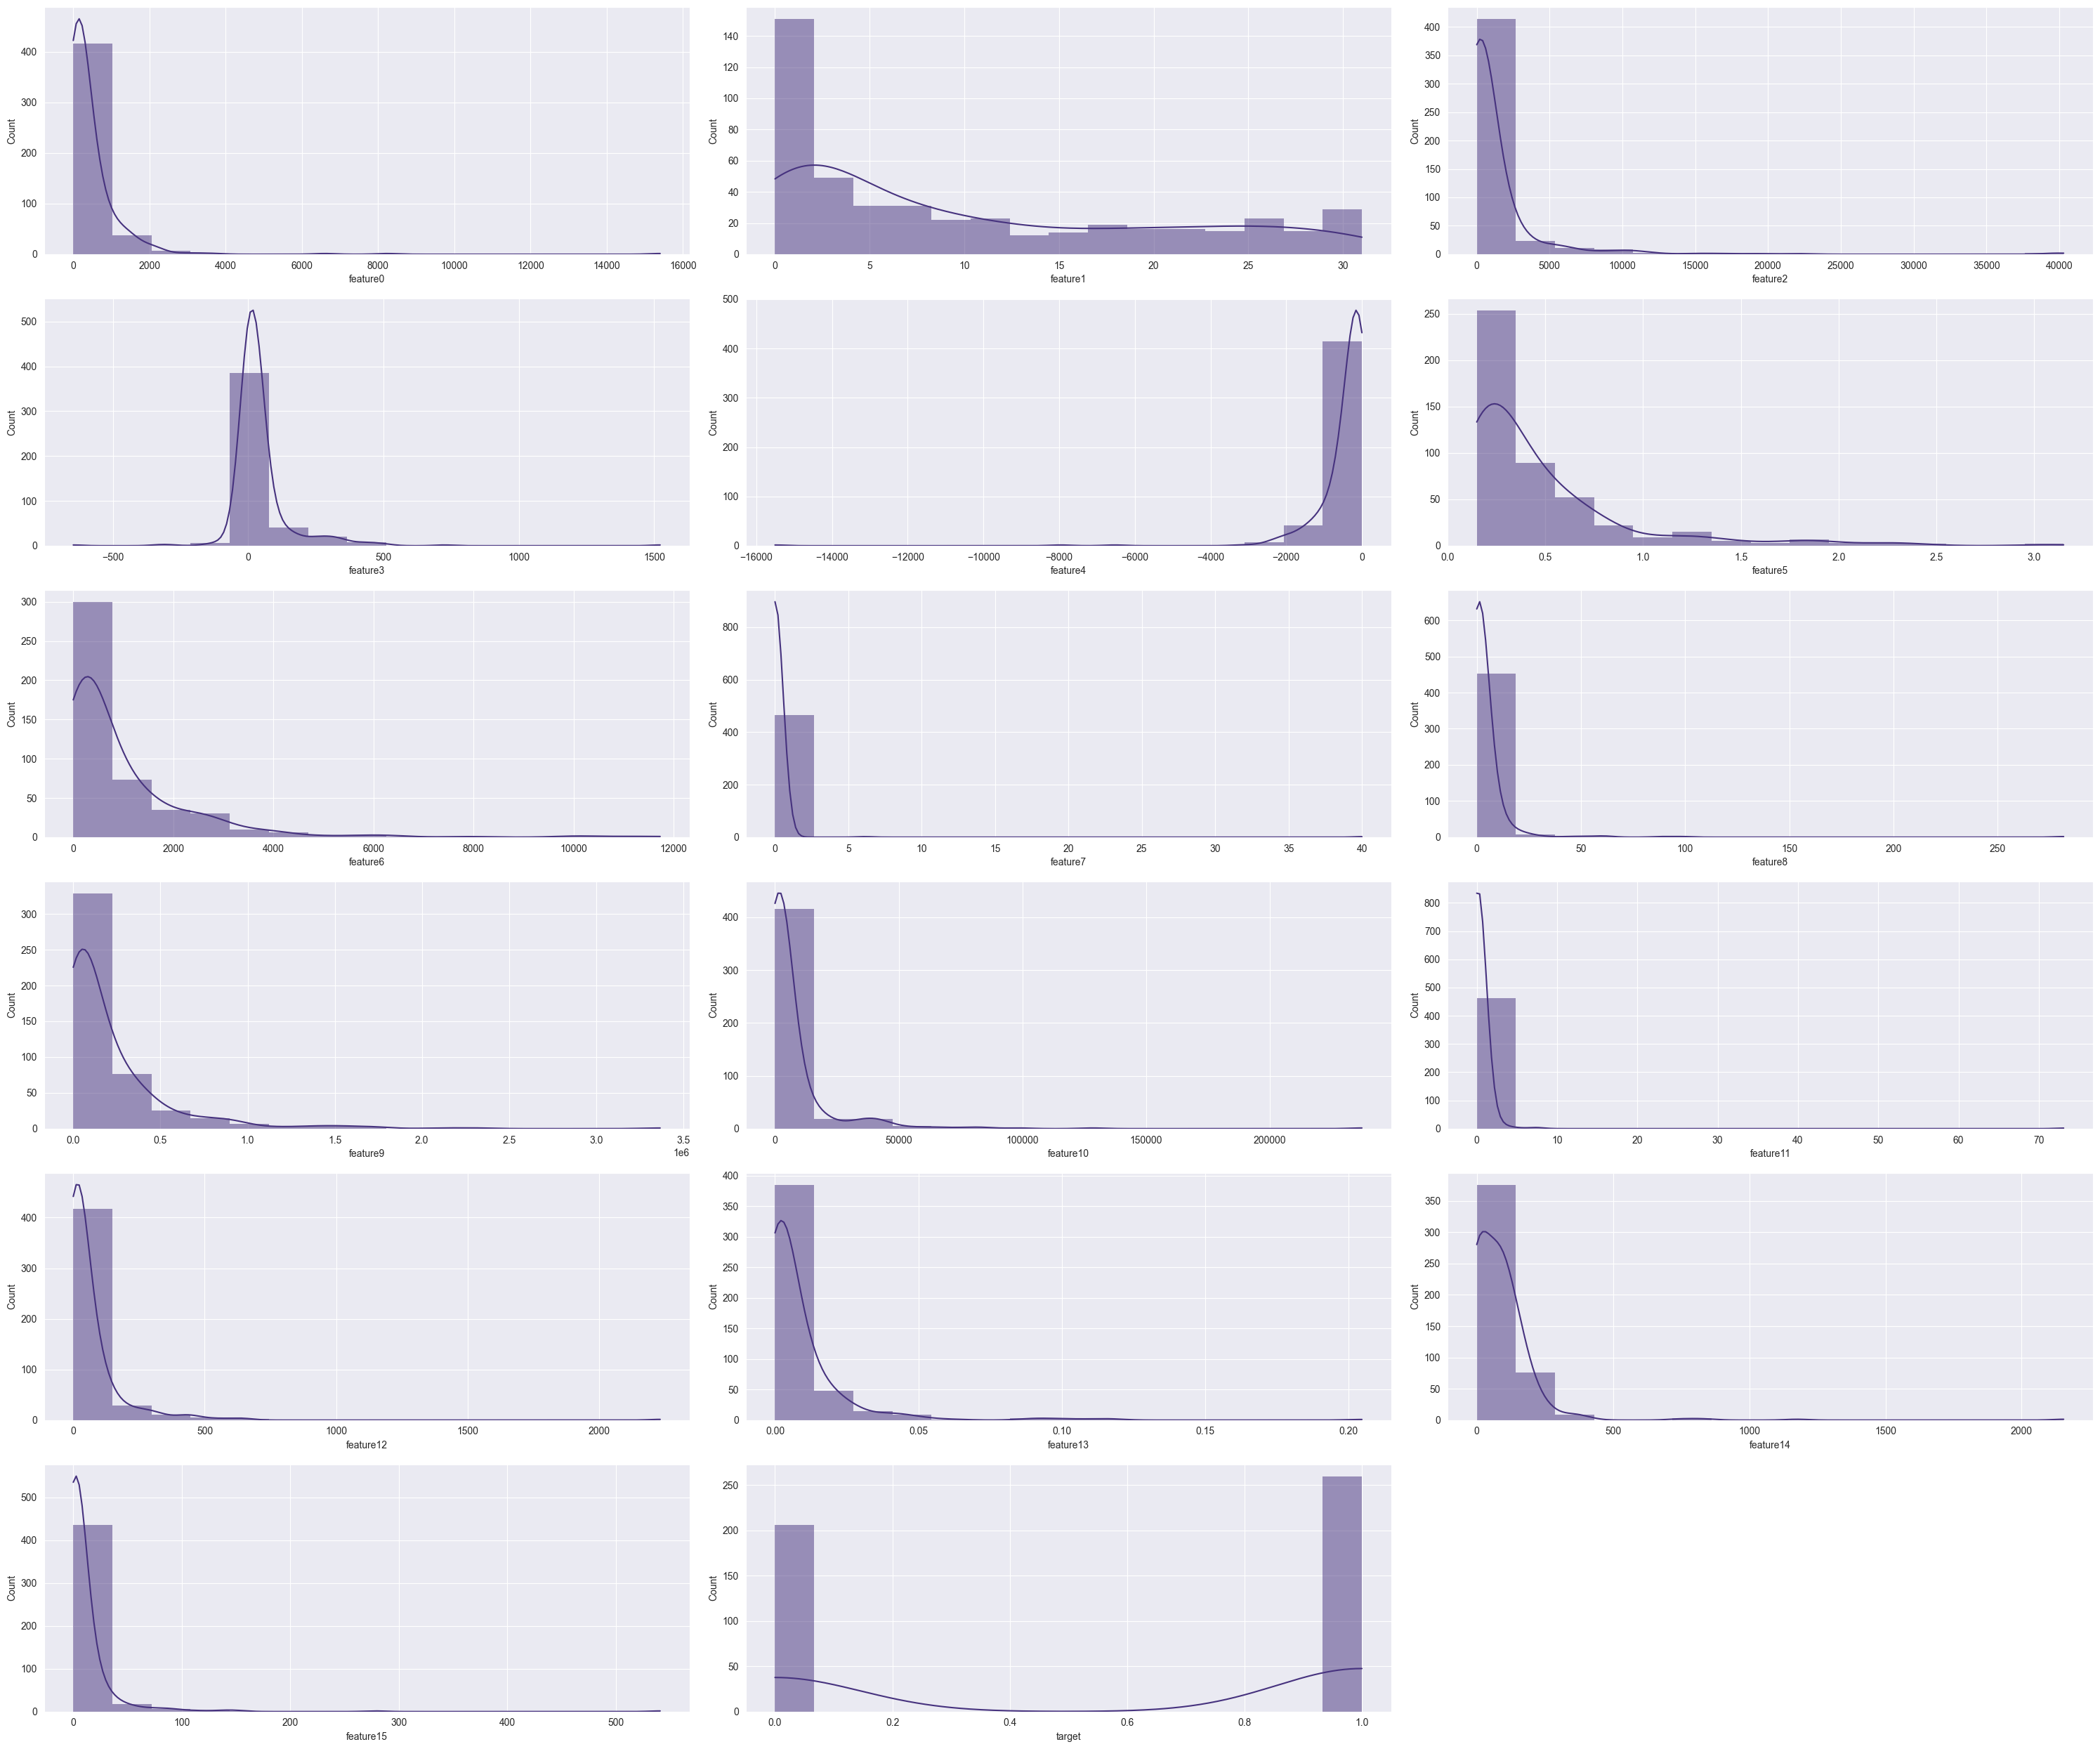

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))

# Obtenha colunas numéricas uma vez, para evitar recalculá-las em cada iteração
numeric_columns = df.select_dtypes(include='number').columns

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    # Adicione edgecolor='none' para remover o contorno
    sns.histplot(df[column], bins=15, kde=True, edgecolor='none')

plt.tight_layout()
plt.show()


Os eixos dos Histogramas permitem perceber que existem uma pequena quantidade de valores muito altos, mas a linha está nos impedindo de visualizar isso por meio da barra de contagem. Vamos retirar a linha do plot (definindo kde=False) e visualizar novamente para realizar observações.

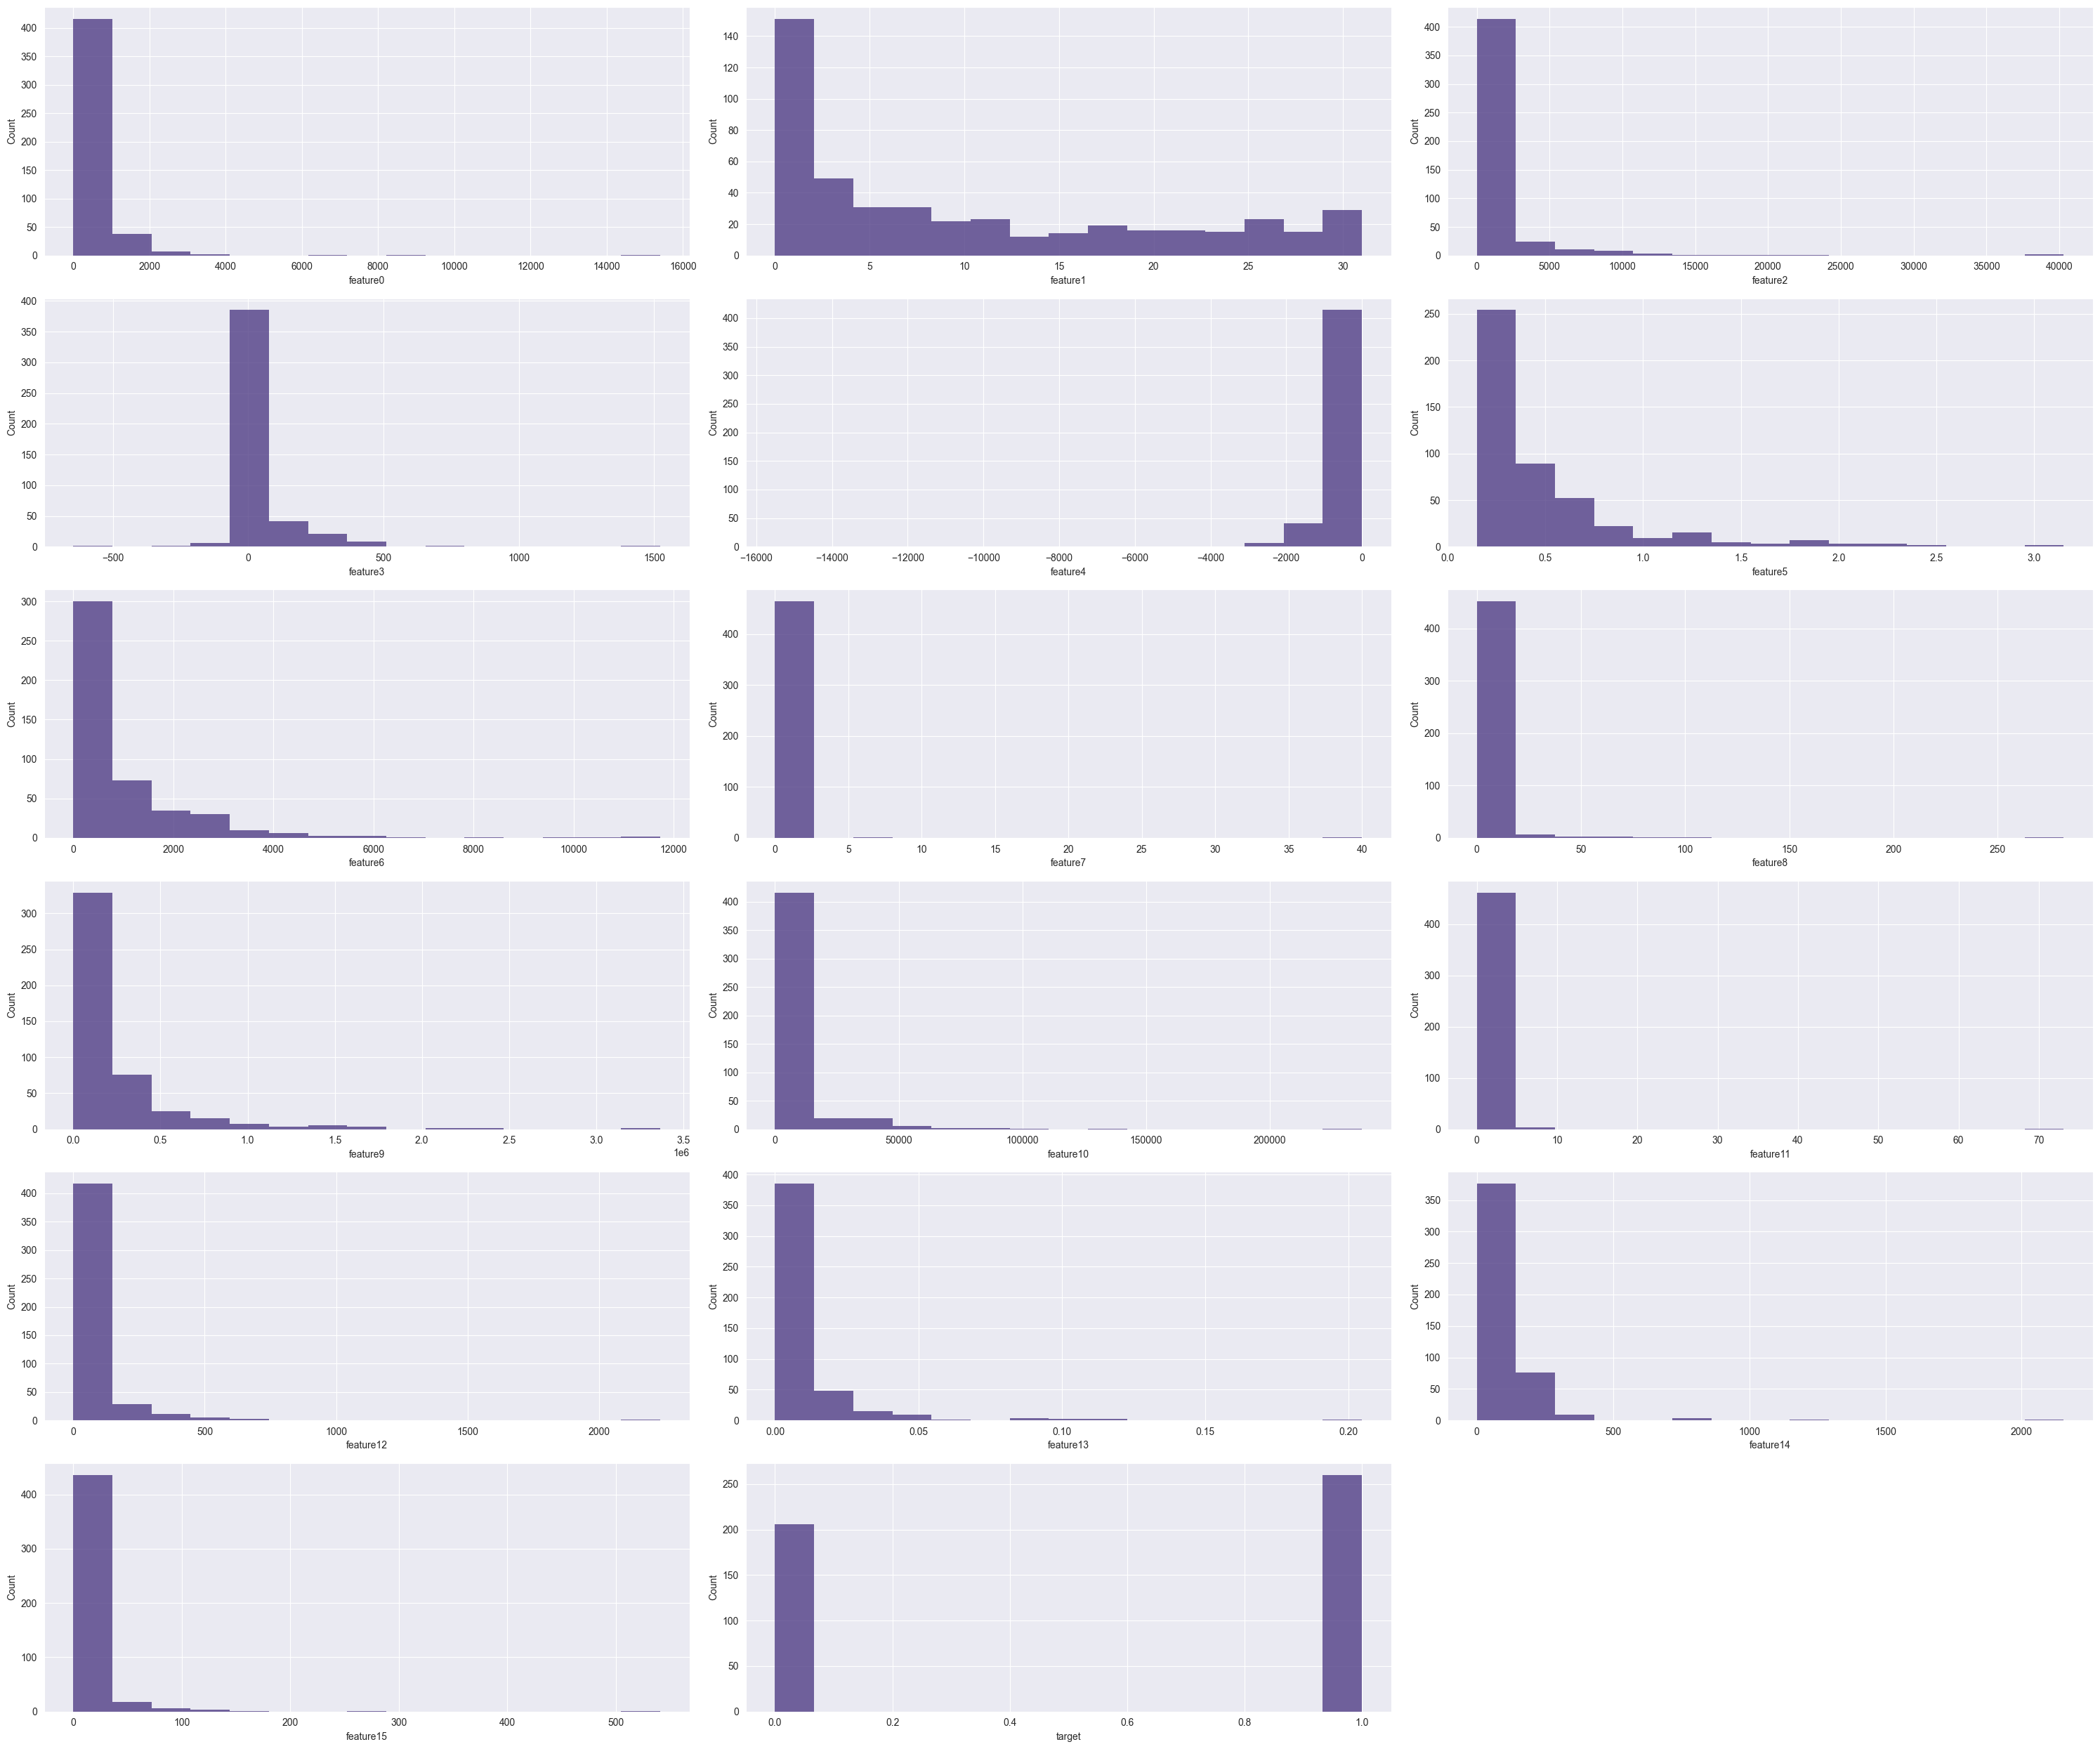

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 25))

# Obtenha colunas numéricas uma vez, para evitar recalculá-las em cada iteração
numeric_columns = df.select_dtypes(include='number').columns

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    # Adicione edgecolor='none' para remover o contorno
    sns.histplot(df[column], bins=15, kde=False, edgecolor='none')

plt.tight_layout()
plt.show()


Com o histograma, agora sem as linhas, é possível notar que:

- feature0: Há uma pequena quantidade de valores muito mais altos que a maioria dos dados.
- feature3: Observa-se uma barra isolada à esquerda, sugerindo a presença de outliers negativos, também parece ter alguns positivos perto de 1500.
- feature4: Similar à feature0, parece haver uma concentração de valores em um extremo da distribuição.
- feature6: Apesar de a maioria dos dados estar concentrada no lado esquerdo, há valores espalhados até um valor muito alto, indicando possíveis outliers.
- feature10: A maioria dos valores está concentrada no início do histograma, mas há uma barra isolada mais à direita.
- feature12: Há uma concentração massiva de valores em um extremo e um valor isolado, indicando um possível outlier.
- feature14: Há uma concentração similar a feature12.
- feature15: Há uma concentração as feature 12 e 14.

Porém, um histograma não é a melhor forma de verificar inconsistências, por isso, vamos avançar para outras análises.

#### **Verificação de Outliers** 
***Outliers*** podem influenciar a análise de dados, já que, por serem valores que se diferenciam significativamente do restante dos dados de um *dataset*, podem influenciar a análise para um viés que não represente a realidade da melhor forma. 

Vamos verificar as observações que fizemos através do histograma com uma análise descritiva dos dados, gráficos boxplot e matriz de correlação.

#### - Análise descritiva dos dados

In [9]:
descriptive_stats = df.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,438.743562,10.257511,1244.322468,44.600880,-434.299893,0.473991,979.070815,0.113885,3.857010,2.164378e+05,6930.456438,0.437333,61.886190,0.008634,87.713360,10.313305,0.557940
std,984.593065,9.858908,3558.699033,122.093515,975.555198,0.452261,1460.738442,1.873746,15.609132,3.508622e+05,17581.800818,3.442094,142.521523,0.017866,145.426437,33.625204,0.497165
min,0.000000,0.000000,0.000000,-645.870000,-15506.350000,0.150000,1.000000,0.000663,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,2.000000,0.000000,-0.400000,-492.035000,0.173669,133.500000,0.003318,0.000000,2.113100e+04,383.687500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.000000,7.000000,169.830000,18.360000,-154.525000,0.303854,420.000000,0.005127,0.937082,8.532850e+04,1410.855000,0.082515,19.692568,0.003207,72.524286,2.000000,1.000000
75%,500.000000,18.000000,1017.375000,44.630000,-50.180000,0.569848,1238.750000,0.009699,2.815824,2.645035e+05,5212.977500,0.311311,65.498098,0.009515,127.301505,8.000000,1.000000
max,15400.000000,31.000000,40291.240000,1521.900000,-0.260000,3.150000,11731.000000,40.000000,281.666667,3.366472e+06,237182.780000,73.080634,2232.100000,0.204611,2154.000000,541.000000,1.000000


- **Contagem de Dados:** Cada feature tem 466.000 observações, indicando que não há valores ausentes nessas colunas, como já visto anteriormente.

- **Média:** O valor médio para cada característica varia consideravelmente, indicando diferentes escalas e distribuições. Por exemplo, a feature1 tem uma média próxima a 10, enquanto a feature10 tem uma média superior a 6000.

- **Desvio Padrão (std):** O desvio padrão também varia muito entre as features, o que sugere que a variação nos dados é bastante heterogênea, ou seja, a dispersão ou a variabilidade dos dados é muito diferente de uma característica para outra. Features com um desvio padrão alto, como a feature10, têm uma dispersão maior dos dados em torno da média.

- **Mínimo e Máximo (min, max):** Os valores mínimos e máximos revelam a amplitude dos dados. Algumas features apresentam valores negativos como mínimos, o que pode ser normal ou indicar outliers, depende do contexto.

- **Quartis (25%, 50%, 75%):** Os quartis fornecem uma visão da distribuição dos dados. O quartil de 50% é a mediana, que é o valor do meio quando os dados são ordenados. A comparação entre a mediana e a média pode indicar a assimetria (em uma distribuição simétrica, a média e a mediana seriam iguais) da distribuição dos dados.

> Quanto aos outliers, se há uma grande diferença entre o valor médio e a mediana, ou se os valores máximos/mínimos são muito distantes dos quartis Q1 e Q3, isso pode indicar a presença de outliers, vamos lidar com eles com o método IQR. Faremos também uma comparação com o método Z-Score, porém, não é um método bom para esse dataset, pois a distribuição dos dados não é normal e o Z-Score assume que a distribuição é normal em sua execução, será apenas para fins de comparação do comportamento ao se utilizar métodos corretos e incorretos para remoção de outliers de acordo com o tipo de distribuição).

**Outros pontos observados:** 

- Algumas features têm uma grande variação nos valores mínimos e máximos, por exemplo, a feature12 vai de 0 a 2322.100000, o que sugere que ela possivelmente é influenciada por outliers.

- Features com um desvio padrão relativamente pequeno comparado à média, como a feature6 com uma média de aproximadamente 3.85 e um desvio padrão de aproximadamente 1.87, podem indicar uma distribuição mais concentrada de valores, o que pode indicar uma variável com menos variabilidade.

#### - Gráficos boxplot

Vamos utilizar o gráfico boxplot para visualizar melhor as informações já obtidas e tentar identificar novos pontos. Abaixo, relatamos o funcionamento de um gráfico boxplot afim de consulta.

**Mediana** (Linha Central do Boxplot): Esta linha dentro da caixa indica a mediana dos dados, ou seja, o ponto médio. Metade dos dados está acima desta linha e a outra metade abaixo.

**Quartis:**

- Primeiro Quartil (Q1): A borda inferior da caixa marca o primeiro quartil, o valor abaixo do qual estão 25% dos dados.
- Terceiro Quartil (Q3): A borda superior da caixa marca o terceiro quartil, abaixo do qual estão 75% dos dados.

**Bigodes (Whiskers):** Estes são os traços que se estendem para fora da caixa. Eles geralmente vão até o menor e o maior valor dentro de 1.5 * IQR a partir dos quartis. Eles indicam a variação nos dados fora dos quartis centralizados.

**Outliers (Pontos Fora da Curva):** São pontos que aparecem fora dos bigodes. Eles indicam valores que são anormalmente baixos ou altos em comparação com o restante dos dados.

**Simetria:** Se a mediana divide a caixa em duas partes iguais, os dados são simétricos. Se uma parte da caixa é significativamente maior que a outra, os dados são assimétricos.

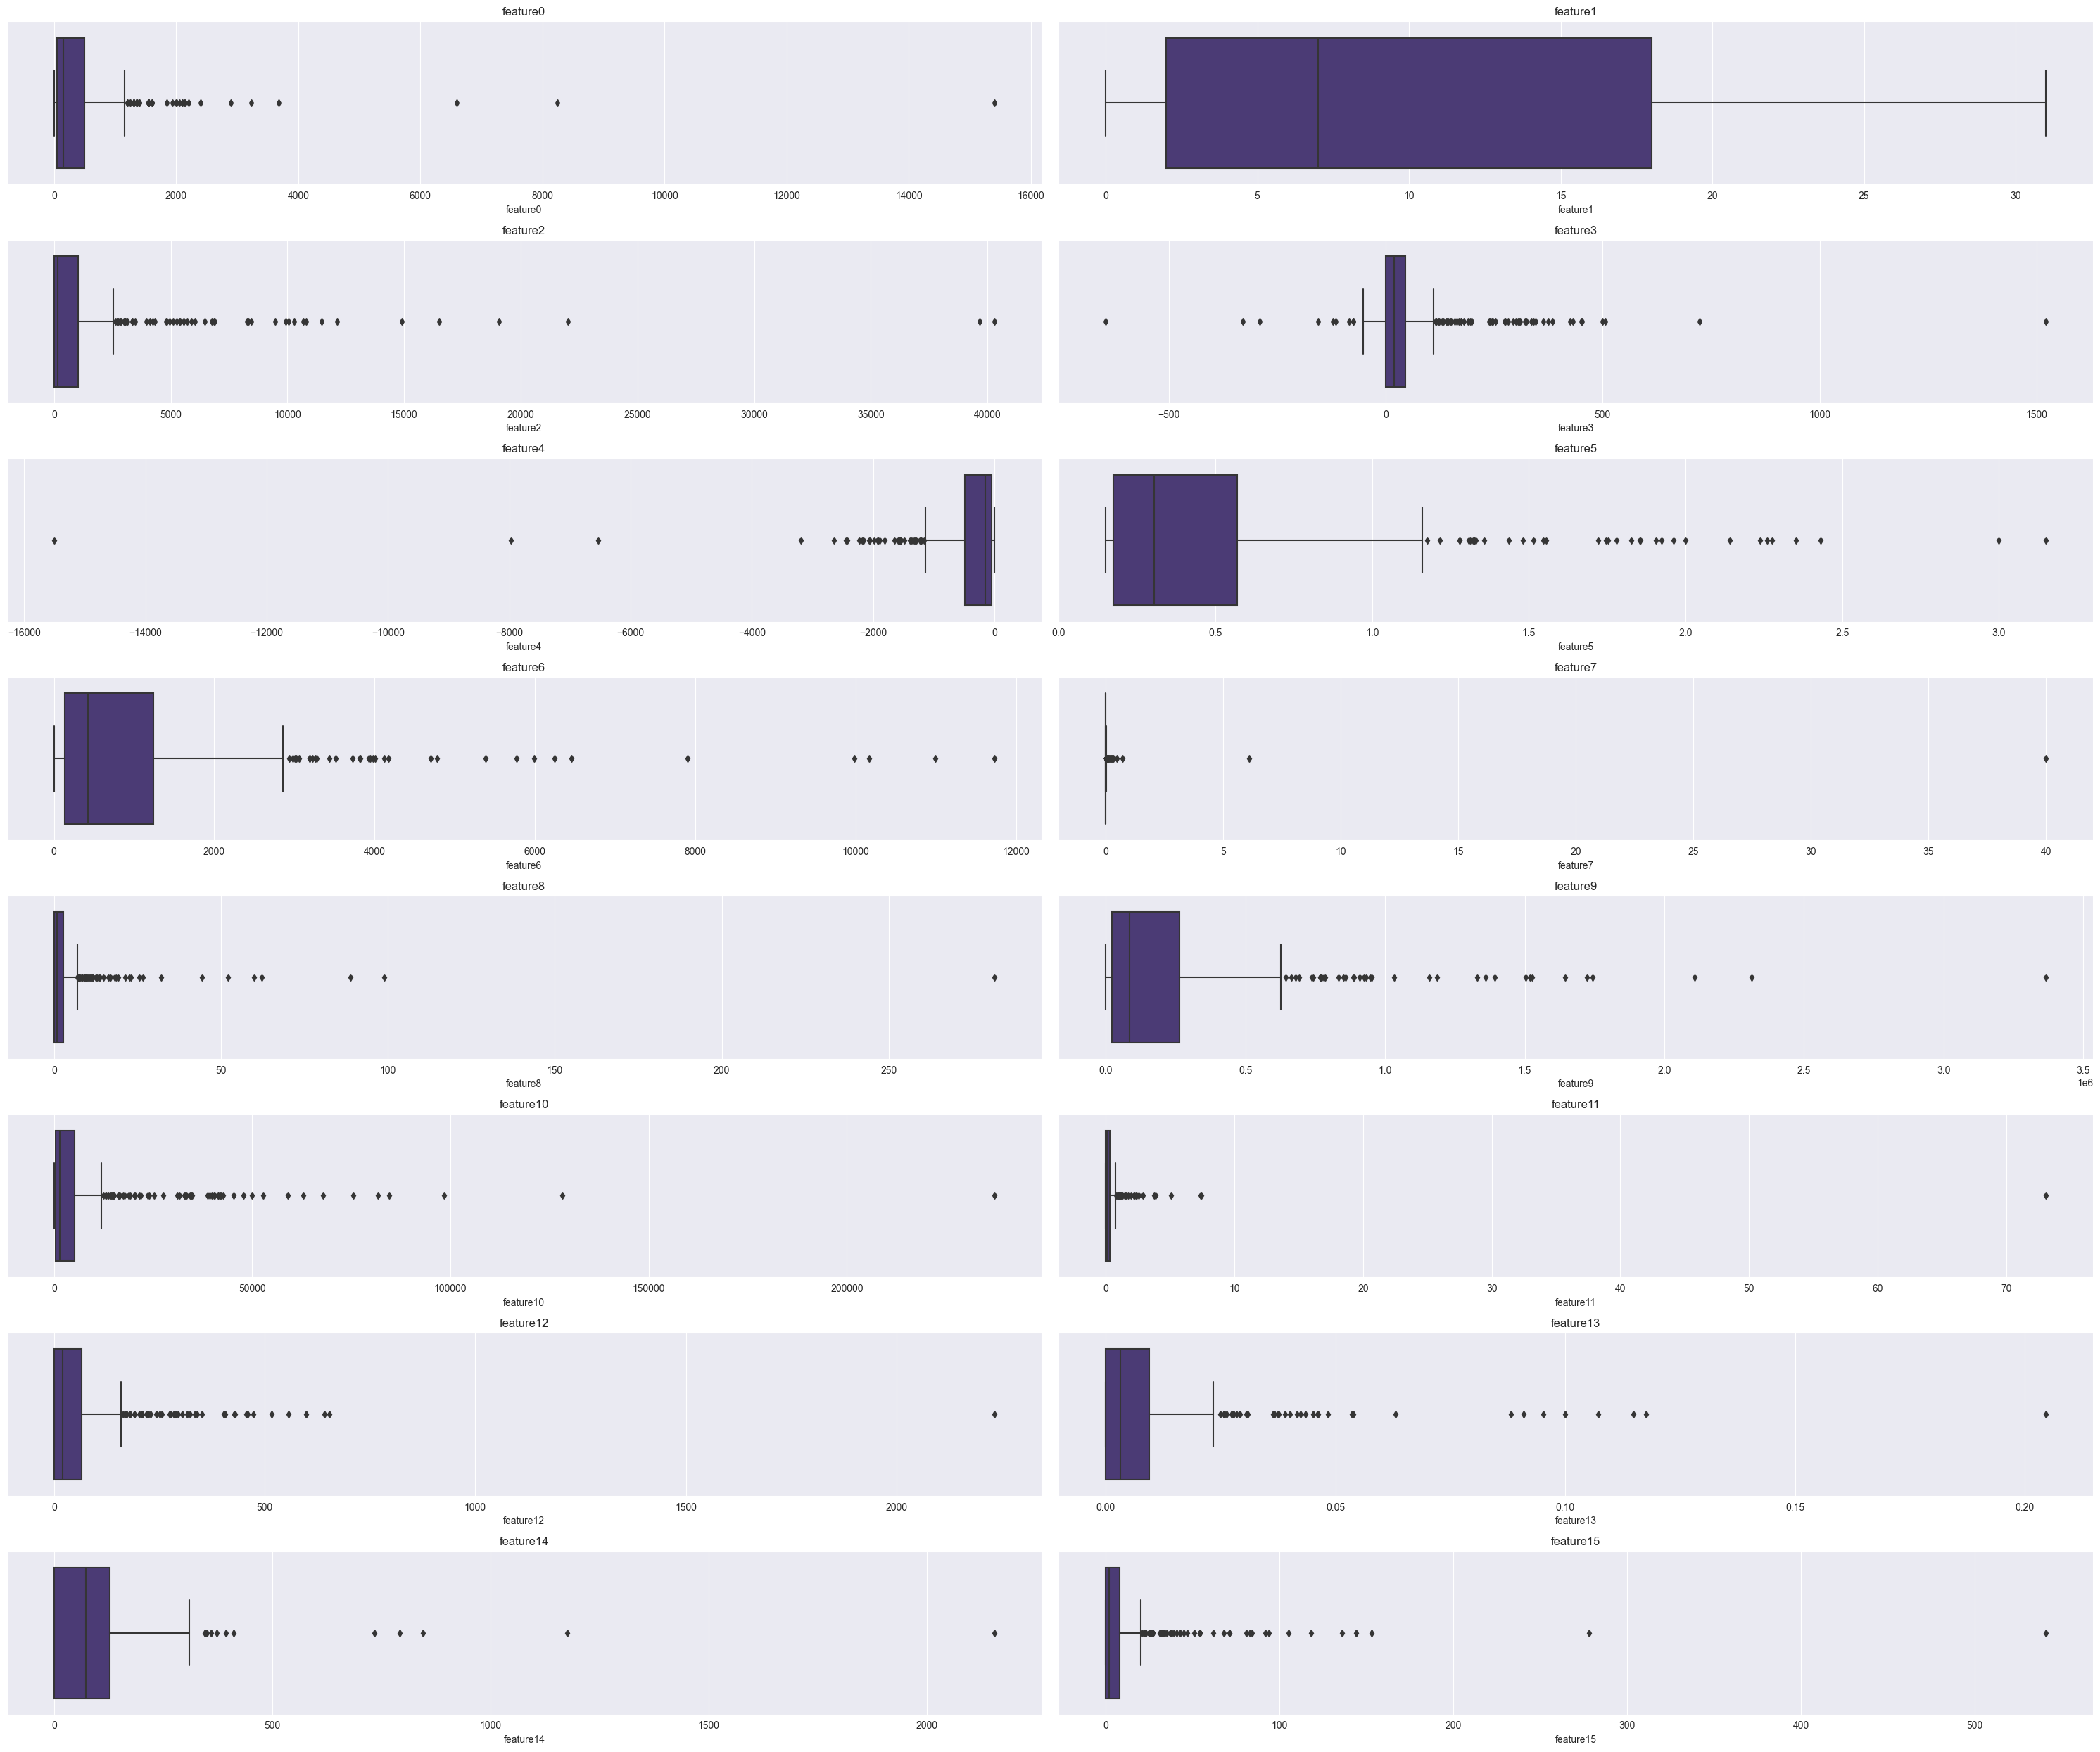

In [10]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (30, 25)

features = df.columns.drop(['target'])
n_features = len(features)

n_rows = math.ceil(n_features / 2)

fig, axes = plt.subplots(n_rows, 2)

for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

for j in range(n_features, n_rows * 2):
    axes.flatten()[j].set_axis_off()

plt.tight_layout()
plt.show()

A partir dos boxplots das features podemos fazer as seguintes observações:

- Exceto pela feature1, que apresenta uma distribuição com a maioria dos valores acima da mediana mas sem outliers, todas as features parecem apresentar outliers (valores acima do bigode máximo e abaixo do bigode mínimo)

#### - Matriz de correlação

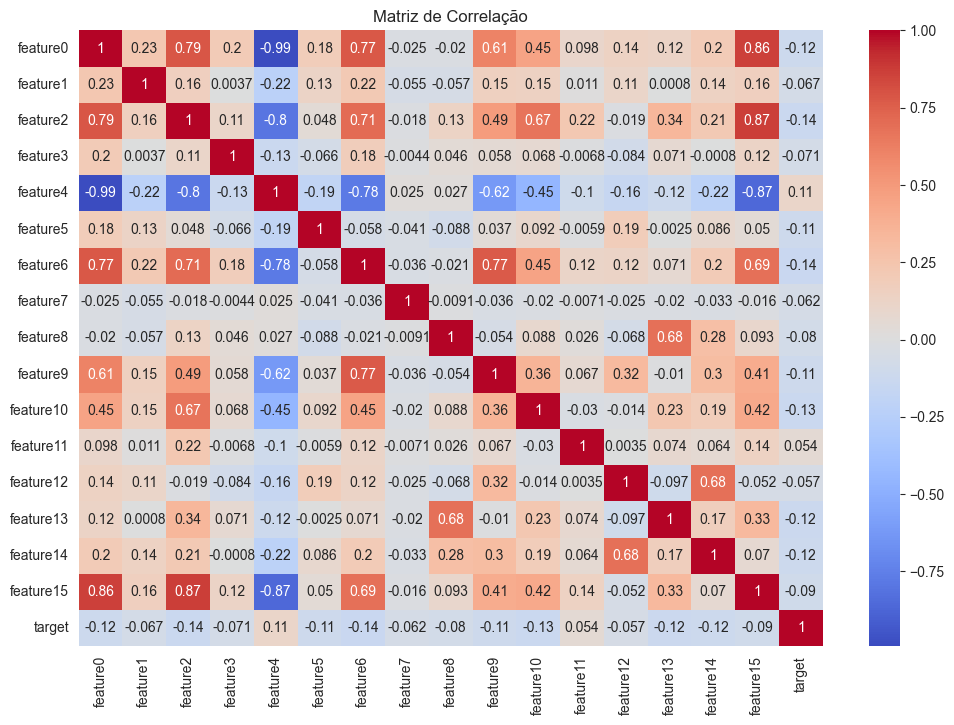

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

- feature0 e feature4 têm uma correlação negativa muito forte.
- feature15 e feature0 têm uma forte correlação positiva, indicada pelo vermelho escuro.
- feature15 e feature2 têm uma forte correlação positiva, indicada pelo vermelho escuro.
- Há várias features com pouca ou nenhuma correlação entre si, como feature3 com muitas outras features, indicadas pela cor branca ou azul claro.
- A linha e a coluna target indicam a correlação de cada feature com a variável alvo. Neste caso, não parece haver uma correlação forte entre a variável alvo e as demais features. **A falta de correlação alta não descarta features como úteis, pois pode haver relações não lineares ou interações com outras variáveis que não são capturadas por coeficientes de correlação.

#### **Aumento de dados** 

Antes de realizar as ações sugeridas para remover possíveis outliers, vamos realizar o aumento de dados, visto que a amostra é muito pequena (466 linhas) e a remoção de outliers vai, provavelmente diminuir significativamente a amostra. Sendo assim, a realização do aumento de dados antes da remoção de outliers pode afetar a percepção sobre quais dados são considerados outliers, ao introduzir variações adicionais que fazem com que alguns valores originalmente considerados outliers pareçam menos extremos em relação ao conjunto de dados expandido.

Obs: O aumento de dados, especialmente quando envolve a adição de ruído, deve ser feito com cuidado para não distorcer as características fundamentais dos dados.

In [12]:
import numpy as np
import pandas as pd

# Inicializando data_combinada com o conjunto de dados original
data_combinada = df.copy()

# Repetindo o processo de perturbação três vezes
for i in range(3):
    # Gerando 'ruído' através do bootstrapping
    # Selecionamos valores aleatórios dos dados (com reposição)
    ruído_iteracao = df.drop(columns=['target']).sample(frac=1, replace=True).reset_index(drop=True)
    
    # Calculando a diferença em relação à média dos dados originais
    ruído_iteracao -= df.drop(columns=['target']).mean()
    
    # Adicionando ruído proporcional às características
    data_perturbada_iteracao = df.drop(columns=['target']) + ruído_iteracao

    # Adicionando a coluna 'target' de volta
    data_perturbada_iteracao['target'] = df['target']

    # Concatenando com o conjunto de dados original
    data_combinada = pd.concat([data_combinada, data_perturbada_iteracao], ignore_index=True)

# Verifique as primeiras linhas do novo conjunto de dados combinado
data_combinada.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2.0,662.28,39.10,-188.55,0.246978,761.0,0.004548,3.523703,167326.0,33441.06,0.019804,26.850,0.009198,94.611429,7.0,0
1,150.0,3.0,0.00,149.55,-0.45,0.150000,3.0,0.037975,0.000000,79.0,78.93,0.000000,0.000,0.000000,0.000000,0.0,1
2,50.0,23.0,346.08,30.41,-102.10,2.430952,42.0,0.004239,3.389618,9907.0,18858.77,0.018351,25.525,0.095238,86.520000,4.0,0
3,100.0,22.0,0.00,43.84,-56.16,0.150968,372.0,0.005854,0.000000,63544.0,1164.11,0.000000,0.000,0.000000,0.000000,0.0,1
4,50.0,18.0,87.56,-3.05,-94.50,0.412664,229.0,0.004572,0.926561,50089.0,1786.26,0.049019,94.500,0.004367,87.560000,1.0,0


In [60]:
data_combinada

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.000000,2.000000,662.280000,39.10000,-188.550000,0.246978,761.000000,0.004548,3.523703,1.673260e+05,33441.060000,0.019804,26.850000,0.009198,94.611429,7.000000,0
1,150.000000,3.000000,0.000000,149.55000,-0.450000,0.150000,3.000000,0.037975,0.000000,7.900000e+01,78.930000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,50.000000,23.000000,346.080000,30.41000,-102.100000,2.430952,42.000000,0.004239,3.389618,9.907000e+03,18858.770000,0.018351,25.525000,0.095238,86.520000,4.000000,0
3,100.000000,22.000000,0.000000,43.84000,-56.160000,0.150968,372.000000,0.005854,0.000000,6.354400e+04,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,50.000000,18.000000,87.560000,-3.05000,-94.500000,0.412664,229.000000,0.004572,0.926561,5.008900e+04,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2801.256438,37.742489,13430.357532,218.36912,-2575.730107,0.415575,5486.929185,-0.102507,9.105268,1.293344e+06,26839.263562,0.416975,5.009066,0.031177,134.684347,105.686695,0
1860,161.256438,23.742489,-702.862468,-48.59088,-217.690107,0.964583,-67.070815,-0.106411,-2.052143,2.663618e+04,-1773.436438,-0.250195,38.113810,-0.001096,92.773307,-7.313305,1
1861,161.256438,2.742489,25.647532,-41.15088,-182.650107,0.424473,795.929185,-0.102298,-0.396249,9.311618e+04,-1296.056438,0.282934,179.120953,0.004152,239.339497,-2.313305,0
1862,561.256438,26.742489,7208.407532,167.59912,-387.000107,0.026009,3067.929185,-0.104385,6.902575,5.079272e+05,-3093.096438,1.975822,-56.751550,0.030317,-32.466759,142.686695,0


#### **Lidando com Outliers** 

Como mencionado anteriormente, vamos realizar uma comparação entre o método Z-score e o método IQR para realizar a remoção de outliers.

Método Z-Score (Não indicado para o dataset devido a distribuição não normal dos dados):

1. Calcular a média (μ) e o desvio padrão (σ) de cada variável.
2. Calcular o Z-score para cada observação x na variável usando a fórmula: Z = (x - μ)/σ
3. Identificar outliers: Observações com um Z-score acima de um certo limiar (comum usar valores como 3 ou -3**) são consideradas outliers.

** 3 ou -3 representa menos de 0,3% do total dos dados, ou seja, dado que 99,7% dos dados em uma distribuição normal estão dentro de três desvios padrão da média, uma observação com um Z-score acima de 3 ou abaixo de -3 é muito incomum. 
Esses valores estão tão distantes da média padrão que são considerados estatisticamente significativos e, portanto, são identificados como outliers.

In [13]:
z_scores = (df - df.mean()) / df.std()
threshold = 3
outliers = (z_scores.abs() > threshold)

outliers_df = pd.DataFrame()

for feature in outliers.columns:
    if outliers[feature].any():
        outliers_df[feature] = df.loc[outliers[feature], feature]

# Se nenhum outlier foi encontrado, o DataFrame permanecerá vazio
if outliers_df.empty:
    print("Nenhum outlier encontrado!")
else:
    print("Outliers identificados pelo cálculo de Z-score:")
outliers_df

Outliers identificados pelo cálculo de Z-score:


,feature0,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15
127,6600.0,39673.40,NaN,-6533.76,NaN,10997,NaN,NaN,2312422.0,237182.78,NaN,NaN,NaN,NaN,136.0
227,3680.0,NaN,1521.9,NaN,NaN,6457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,8240.0,19078.48,NaN,-7966.54,NaN,9984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0
429,15400.0,40291.24,NaN,-15506.35,NaN,11731,NaN,NaN,1722754.0,NaN,NaN,NaN,NaN,NaN,541.0


In [14]:
df_cleaned_zcore = df[~outliers.any(axis=1)]
df_cleaned_zcore

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
1,150.0,3,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
3,100.0,22,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
4,50.0,18,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
5,850.0,9,1435.68,1.60,-848.40,0.589167,1440,0.003879,1.692221,371185,2745.78,0.522868,40.400000,0.014583,68.365714,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0.0,5,0.00,-0.10,-50.10,0.150000,334,0.011295,0.000000,29570,189.98,0.000000,0.000000,0.000000,0.000000,0,1
460,1050.0,9,1955.83,17.20,-1231.20,0.600000,1968,0.007718,1.656360,255002,3013.01,0.649128,73.800000,0.008130,122.239375,16,1
462,350.0,7,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
463,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0


In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = data_combinada[~((data_combinada < (Q1 - 1.5 * IQR)) | (data_combinada > (Q3 + 1.5 * IQR))).any(axis=1)]

print("DataFrame após a remoção de outliers:")
display(df_cleaned)

DataFrame após a remoção de outliers:


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
3,100.000000,22.000000,0.000000,43.84000,-56.160000,0.150968,372.000000,0.005854,0.000000,63544.000000,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,50.000000,18.000000,87.560000,-3.05000,-94.500000,0.412664,229.000000,0.004572,0.926561,50089.000000,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
6,50.000000,1.000000,436.850000,6.80000,-82.150000,0.238116,345.000000,0.018375,5.317712,18776.000000,959.570000,0.455256,20.537500,0.011594,109.212500,4.000000,1
7,0.000000,0.000000,0.000000,-6.50000,-16.800000,0.150000,112.000000,0.017231,0.000000,6500.000000,6692.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0
11,0.000000,0.000000,0.000000,-0.25000,-35.850000,0.150000,239.000000,0.003744,0.000000,63834.000000,112.890000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,-388.743562,18.742489,-1129.332468,8.09912,393.449893,-0.060784,-791.070815,0.001999,5.491770,-179610.824034,-1948.566438,-0.411792,-49.586190,0.003561,27.276640,-9.313305,1
1522,-388.743562,29.742489,-1244.322468,1.79912,402.249893,0.384117,-904.070815,-0.001748,-3.857010,-212145.824034,-6386.366438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,0
1610,-388.743562,20.742489,-829.432468,-23.85088,367.149893,-0.007787,-720.070815,0.011830,5.301710,-207109.824034,982.243562,-0.373322,-39.236190,0.004611,119.731640,-8.313305,0
1781,161.256438,1.742489,1502.987532,4.69912,-125.500107,-0.105802,1673.929185,0.005578,6.553680,121472.175966,-929.186438,0.418609,-27.871375,0.012841,87.979603,19.686695,0


In [16]:
print(df_cleaned['target'].value_counts())

1    144
0     70
Name: target, dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# Supondo que 'df' seja o seu DataFrame

# Separar as características e o alvo
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

# Contar as classes antes do SMOTE
print("Antes do SMOTE:", Counter(y))

# Aplicar SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Contar as classes após o SMOTE
print("Após o SMOTE:", Counter(y_smote))

# Criar um novo DataFrame a partir dos dados aumentados
df_smote = pd.DataFrame(X_smote, columns=X.columns)
df_smote['target'] = y_smote


Antes do SMOTE: Counter({1: 144, 0: 70})
Após o SMOTE: Counter({1: 144, 0: 144})


In [18]:
df_smote

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
0,100.000000,22.000000,0.000000,43.840000,-56.160000,0.150968,372.000000,0.005854,0.000000,63544.000000,1164.110000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,50.000000,18.000000,87.560000,-3.050000,-94.500000,0.412664,229.000000,0.004572,0.926561,50089.000000,1786.260000,0.049019,94.500000,0.004367,87.560000,1.000000,0
2,50.000000,1.000000,436.850000,6.800000,-82.150000,0.238116,345.000000,0.018375,5.317712,18776.000000,959.570000,0.455256,20.537500,0.011594,109.212500,4.000000,1
3,0.000000,0.000000,0.000000,-6.500000,-16.800000,0.150000,112.000000,0.017231,0.000000,6500.000000,6692.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,-0.250000,-35.850000,0.150000,239.000000,0.003744,0.000000,63834.000000,112.890000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,373.448362,3.575174,983.235360,-16.703550,-413.448165,0.700863,595.133763,0.003725,2.241759,159704.712543,5038.111470,0.185408,56.002544,0.010677,140.462194,6.256554,0
284,435.234341,7.818747,182.090101,56.301763,-378.932578,0.819214,459.314806,0.004183,0.759975,110291.830494,4138.317266,0.024165,7.075704,0.002034,36.418020,0.738283,0
285,85.470449,12.431859,-349.914652,16.764989,-41.862387,0.178332,146.448659,0.009525,3.841786,-1550.008411,-35.675554,-0.051602,9.289317,0.005714,59.226445,-1.339516,0
286,50.000000,3.946589,0.000000,45.709358,-4.290642,0.170351,26.026481,0.005699,0.000000,4434.835268,18.130587,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [19]:
print(f'Entradas no DataFrame antes da remoção de Outliers com Z-score: {df_cleaned.shape[0]} linhas no total')
print(f'Variáveis no DataFrame antes da remoção de Outliers com Z-score: {df_cleaned.shape[1]} colunas no total\n')

print(f'Entradas no DataFrame depois da remoção de Outliers com Z-score: {df_smote.shape[0]} linhas no total')
print(f'Variáveis no DataFrame depois da remoção de Outliers com Z-score: {df_smote.shape[1]} colunas no total')

Entradas no DataFrame antes da remoção de Outliers com Z-score: 214 linhas no total
Variáveis no DataFrame antes da remoção de Outliers com Z-score: 17 colunas no total

Entradas no DataFrame depois da remoção de Outliers com Z-score: 288 linhas no total
Variáveis no DataFrame depois da remoção de Outliers com Z-score: 17 colunas no total


#### **Análise estatística para verificar melhoria** 

In [20]:
descriptive_stats = df_smote.describe()
descriptive_stats

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000
mean,133.129984,8.732781,104.811861,18.453418,-135.188587,0.353923,383.675893,0.006363,1.010188,82975.254712,1366.571027,0.070991,20.895067,0.002875,43.148163,1.036582,0.50000
std,217.381106,8.991615,433.928599,25.751449,213.666930,0.245424,519.997025,0.004652,1.671640,121638.170785,2441.090671,0.185474,38.855110,0.004592,61.541578,3.893288,0.50087
min,-438.743562,-8.257511,-1244.322468,-47.820000,-969.670000,-0.159699,-904.070815,-0.005904,-3.857010,-212145.824034,-6386.366438,-0.437333,-61.886190,-0.008634,-87.713360,-10.313305,0.00000
25%,50.000000,1.000000,0.000000,-0.300000,-196.850000,0.163646,93.750000,0.003249,0.000000,10020.301694,194.905284,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,59.717617,5.804062,0.000000,12.359560,-77.340000,0.300000,211.964592,0.004554,0.000000,47161.170458,619.792399,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000
75%,183.024429,14.033992,183.975000,38.122832,-24.550000,0.475214,595.850323,0.008896,1.602871,129752.920050,2039.765000,0.125832,43.771250,0.004620,86.157500,2.000000,1.00000
max,950.000000,34.742489,1742.890000,110.400000,402.249893,1.155334,2553.000000,0.019152,6.995526,571517.000000,10936.790000,0.737727,159.315000,0.022026,273.754973,20.000000,1.00000


- Os valores agora parecem ter uma distribuição melhor, como é o caso da feature12 que tinha como valor mínimo 0 e máximo 2232.100000, o que apontamos anteriormente como presença de outliers. Agora o valor máximo para essa feature é de 459.000000, uma diferença significativa.
- No geral, as diversas features alteradas demonstram melhoria na sua distribuição

#### **Analisando a variável target** 

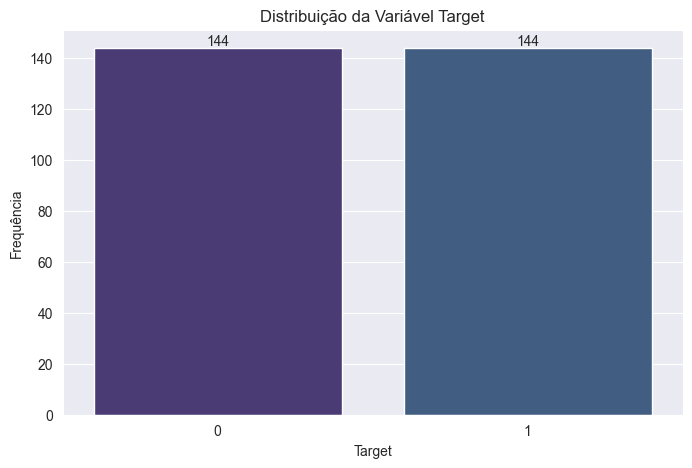

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

target_distribution = df_smote['target'].value_counts()

plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target')
plt.xlabel('Target')
plt.ylabel('Frequência')

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             int(bar.get_height()), 
             ha='center', va='bottom')

plt.show()

A partir do gráfico de barras, podemos analisar a distribuição da variável target, que representa duas categorias: 0 e 1. Esta variável é binária e indica se um evento ocorreu (1) ou não (0), como já citado anteriormente. Observamos que a categoria 1 ocorre com uma frequência significativamente maior do que a categoria 0. Isso pode levar a um viés em modelos de aprendizado de máquina, onde o modelo pode ter uma tendência a prever predominantemente a classe mais frequente, portanto é um ponto de atenção ao realizar o treinamento.

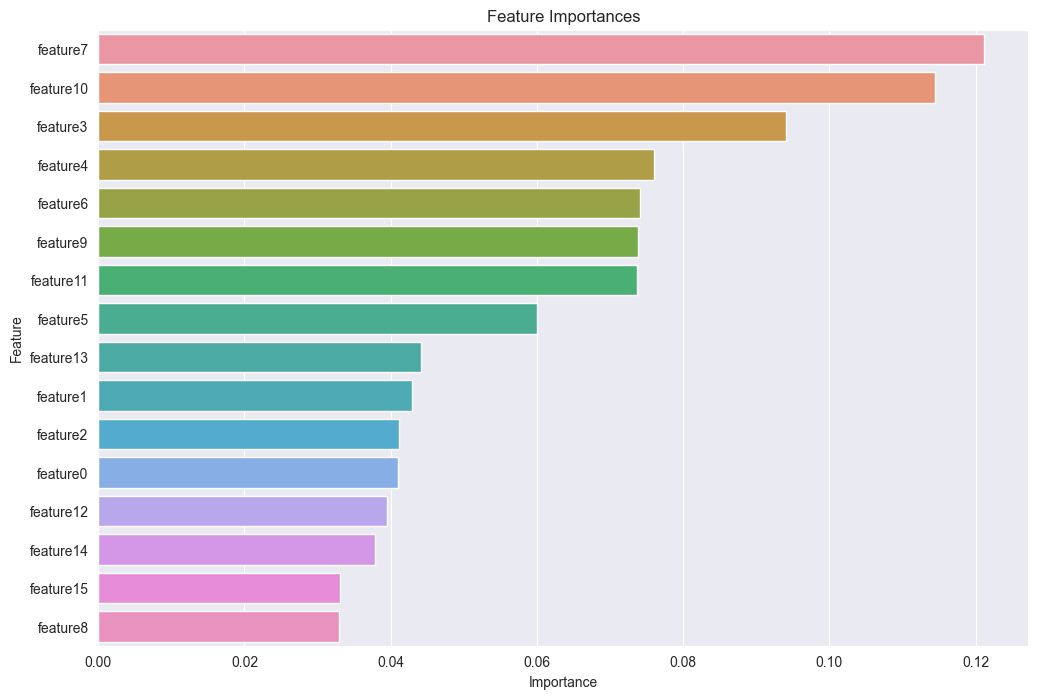

0.5714285714285714

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separando as features e o target
X = df.drop('target', axis=1)
y = df['target']

# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Previsão e avaliação da acurácia
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Obtendo a importância das features
feature_importances = rf.feature_importances_

# Criando um DataFrame para visualizar a importância das features
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Retornando a acurácia do modelo
accuracy

In [53]:
#df_filtrado = df_cleaned[['feature3', 'feature7', 'feature10', 'target']]
df_filtrado = df_smote[['feature3', 'feature7', 'feature10', 'feature4', 'feature6', 'feature9', 'feature11', 'target']]


In [54]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir os dados em características (X) e alvo (y)
X = df_filtrado.drop('target', axis=1)
y = df_filtrado['target']

# Definir o modelo SVM
svm_model = SVC(probability=True)

# Definir a estratégia de validação cruzada
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# Calcular as métricas usando validação cruzada
accuracy_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='accuracy')
precision_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='precision_macro')
recall_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='recall_macro')
f1_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='f1_macro')

# O cálculo do ROC AUC Score com cross_val_score é um pouco mais complexo, pois precisamos das probabilidades
roc_auc_scores = cross_val_score(svm_model, X, y, cv=kfold, scoring='roc_auc')

# Exibir os resultados
print(f"Average Accuracy: {accuracy_scores.mean()}")
print(f"Average Precision: {precision_scores.mean()}")
print(f"Average Recall: {recall_scores.mean()}")
print(f"Average F1 Score: {f1_scores.mean()}")
print(f"Average ROC AUC Score: {roc_auc_scores.mean()}")


Average Accuracy: 0.5590277777777778
Average Precision: 0.5627788290569974
Average Recall: 0.5590277777777778
Average F1 Score: 0.5540472557753099
Average ROC AUC Score: 0.5891203703703703


In [56]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Suponha que df_filtrado é o seu DataFrame
# Divisão em features e target
X = df_filtrado.drop('target', axis=1)
y = df_filtrado['target']

# Escalando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Configuração de validação cruzada
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Listas para armazenar métricas e número de iterações
acc_scores, prec_scores, rec_scores, f1_scores, auc_roc_scores, iterations = [], [], [], [], [], []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', 
                        alpha=0.3, solver='lbfgs', max_iter=3250, 
                        random_state=42, early_stopping=True, validation_fraction=0.1)
    mlp.fit(X_train, y_train)

    # Armazenando o número de iterações
    iterations.append(mlp.n_iter_)

    y_pred = mlp.predict(X_val)
    acc_scores.append(accuracy_score(y_val, y_pred))
    prec_scores.append(precision_score(y_val, y_pred))
    rec_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auc_roc_scores.append(roc_auc_score(y_val, y_pred))

# Calculando médias
avg_accuracy = np.mean(acc_scores)
avg_precision = np.mean(prec_scores)
avg_recall = np.mean(rec_scores)
avg_f1_score = np.mean(f1_scores)
avg_auc_roc_score = np.mean(auc_roc_scores)

# Imprimindo resultados
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1_score}")
print(f"Average AUC-ROC Score: {avg_auc_roc_score}")
print(f"Average number of iterations: {np.mean(iterations)}")

# Se desejar ver o número de iterações para cada fold individualmente
print("Iterations per fold:", iterations)


Average Accuracy: 0.7118055555555557
Average Precision: 0.7338834569955851
Average Recall: 0.6760072877314256
Average F1 Score: 0.6981149214582866
Average AUC-ROC Score: 0.7180187857992376
Average number of iterations: 2106.1666666666665
Iterations per fold: [1314, 2595, 2765, 1156, 1775, 3032]


In [57]:
# Busca grid search adicionar aq
# {'activation': 'tanh', 'alpha': 3, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}

In [58]:
# MLP com parametros definidos pela grid search 
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Divisão em features e target
X = df_filtrado.drop('target', axis=1)
y = df_filtrado['target']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, prec_scores, rec_scores, f1_scores, roc_scores = [], [], [], [], []

for train_index, val_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', 
                        alpha=0.3, solver='adam', max_iter=20, 
                        random_state=42, early_stopping=True, validation_fraction=0.1,)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_val)
    acc_scores.append(accuracy_score(y_val, y_pred))
    prec_scores.append(precision_score(y_val, y_pred))
    rec_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    roc_scores.append(roc_auc_score(y_val, y_pred))

avg_accuracy = np.mean(acc_scores)
avg_precision = np.mean(prec_scores)
avg_recall = np.mean(rec_scores)
avg_f1_score = np.mean(f1_scores)
avg_roc_score = np.mean(roc_scores)

print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1_score}")
print(f"Average ROC Score: {avg_roc_score}")

C:\Users\viviane.silva\AppData\Local\anaconda3\envs\estudos\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\viviane.silva\AppData\Local\anaconda3\envs\estudos\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Average Accuracy: 0.4889897156684816
Average Precision: 0.43946386946386945
Average Recall: 0.37685902806870547
Average F1 Score: 0.3452956944766191
Average ROC Score: 0.5220396076444463
